# Linear Regression
- 선형 회귀는 2차원 평면에 놓인 점을 표현하는 1차함수의 기울기와 절편을 찾아줌
- 선형회귀로 찾은 1차함수를 모델이라고 부름
- 선형 회귀 모델로 새 값 x에 대하여 y를 예측할 수 있음
- 입력 데이터(x)와 타깃 데이터(y)를 통해 기울기(a)와 절편(b)를 찾는 것이 목표

# 02-1. sklearn의 당뇨병 환자 데이터셋
- 사이킷런에서 제공하는는 데이터셋
- 목표 : 당뇨병 환자의 1년 후, 병의 진전된 정도를 예측하는 모델을 만드는 것

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
print(diabetes.data.shape, diabetes.target.shape)
# data는 2차원의 422x10, target은 1차원의 422개의 요소를 가진 배열
# 행은 샘플(sample)이고 열은 샘플의 특성(feature)

(442, 10) (442,)


In [3]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [4]:
diabetes.target[:3] # 위 data의 첫번째 샘플은 151. 이라는 타깃 데이터에 대응됨
# 수치에 대한 해석은 전문가(의사)의 영역.
# 입력데이터와 타깃 데이터의 수치만 보고 둘사이의 규칙(모델)을 찾으면 됨
# 하지만 실전에서는 데이터의 의미를 아는 것이 매우 중요할 수 있으므로 이러한 경우 해당 분야 전문가의 도움받는게 좋음

array([151.,  75., 141.])

# 02-2. 당뇨병 환자 데이터 시각화하기
- 당뇨병 데이터 세트에는 10개 이상의 특성이 있음
- 특성들을 모두 그래프로 표현하려면 3차원 이상의 그래프를 그려야 함
- 하지만 3차원 이상의 그래프는 그릴 수 없으므로 1개의 특성만 사용
- 세번째 특성과 타깃 데이터로 산점도 그릴 예정

In [5]:
import matplotlib.pyplot as plt

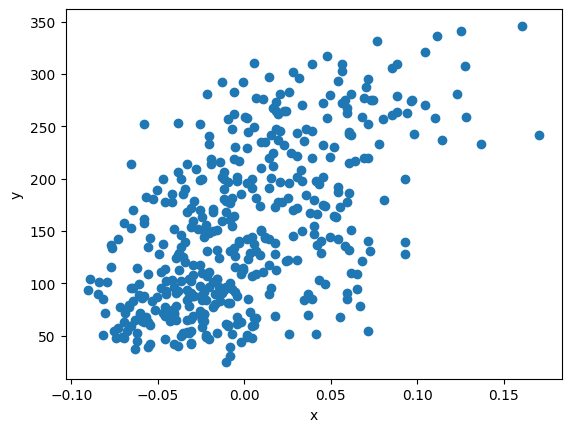

In [6]:
# plt.scatter(x,y)
# plt.xlabel(), plt.ylabel() : 각 축의 라벨
# xlabel : data의 세번째 특성, ylabel은 타깃
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x') 
plt.ylabel('y')
plt.show()

- 즉, 산점도 그래프를 잘 표현하는 직선의 방정식을 찾는 것이 회귀 알고리즘의 목표

# 02-3. 훈련 데이터 준비하기
- 산점도로 특성(입력 데이터)과 타깃 데이터 사이에 정비례 관계가 있음 확인
- 매번 diabetes.data를 입력하기 번거로우니 미리 변수 x에 저장
- 타깃 데이터는 변수 y에 저장

In [7]:
x = diabetes.data[:, 2]
y = diabetes.target

# 02-4. 경사 하강법
- 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘
- 많은 양의 데이터에 사용하기 좋은 알고리즘
- 회구문제를 풀기 위한 유일한 알고리즘은 아님. 정규방정식(Nomal Equation), 결정트리(Decision Tree), 서포트벡터머신(SVM) 등 많긴 함

- ​y^=w⋅x+b
- 𝑤 : 가중치(weight) – 입력에 곱해지는 값
- 𝑥 : 입력(input feature) – 학습에 사용되는 데이터
- 𝑏 : 바이어스(bias) – 절편, 선형 변환 뒤에 더해지는 상수
- ​y^ : 출력(prediction) – 모델이 예측한 값

## 02-4-1. 훈련데이터(x,y)에 잘 맞는 w와 b찾기(직관적으로)
1. 무작위로 w와 b를 정해 모델 만들기
2. x에서 샘플 하나를 선택하여 ​y^(예측값) 계산하기
3. y^과 선택한 샘플의 진짜 ​y를 비교하기 : 예측값과 정답 비교하기, 틀릴 확률 99%
4. y^이 ​y와 더 가까워지도록 w, b 조정 : 실제로 계산을 해보면 가장 간단하긴 함
5. 모든 샘플 처리할 때까지 위 과정 반복

In [8]:
# 일단 무작위 초기화
w = 1.0
b = 1.0

In [9]:
# 첫 번째 샘플 x[0]에 대한 y_hat 계산
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [10]:
# 첫번째 샘플 x[0]에 대응하는 타깃값 y[0]과 y_hat(예측데이터) 비교
print(y[0])

151.0


In [11]:
# 매우 다름
# w와 b를 변경하며 증감 살펴보기
# 1차함수의 기울기를 0.1만큼 높여준다고 생각
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

1.0678658271705517


In [12]:
# w값 조정한 후 예측값 증가 정도 확인
# y_hat 증가량 / w 증가량
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)
# 근데 결국 w_rate에 대한 코드를 수식으로 정리하면 변화율은 첫번째 샘플인 x[0]이 됨

0.06169620651868429


## 02-4-2. 변화율로 가중치 w 업데이트하기

In [13]:
# 변화율이 양수, 음수일때 모두 변화율을 더하여 가중치를 업데이트함
w_new = w + w_rate
print(w_new)

1.0616962065186843


## 02-4-3. 변화율로 절편 b 업데이트하기

In [14]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [15]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [16]:
# 절편이 1만큼 증가하면 y값도 1만큼 증가
# 즉 b 업데이트는 변화율만큼 더하면 됨
b_new = b + 1
print(b_new)

2.0


## 02-4-4. 한계점
- y_hat이 y에 한참 미치지 못할 경우 w, b를 더 큰 폭으로 수정 불가
- y_hat이 y보다 커지며 y_hat을 감소시키지 못함

## 02-4-5. 오차 역전파로 가중치와 절편 업데이트
- y에서 y^을 뺀 오차의 양을 변화율에 곱하는 방법으로 w 업데이트
- y^이 y보다 많이 작거나 큰 경우에도 w와 b를 많이 바꿀 수 있음

In [17]:
err = y[0] - y_hat
w_new = w + w_rate * err # 오차 곱해줌
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [18]:
# 두번째 샘플 x[1] 사용하여 오차 구함
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1] # 앞서 샘플값과 같아진다는 것을 알았으므로 w_rate 별도로 계산x, 샘플값 그대로 사용
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


## 02-4-6. 전체 샘플 반복하기

In [19]:
# 이러한 방식으로 모든 샘플을 사용해 가중치와 절편 업데이트
# 반복문 사용
# zip()함수는 여러 개의 배열에서 동시에 요소를 하나씩 꺼내줌
for x_i, y_i in zip(x, y): # 여기서는 입력 x와 타깃 y배열에서 요소 하나씩 꺼내줌
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


## 02-4-7. 그래프로 확인하기

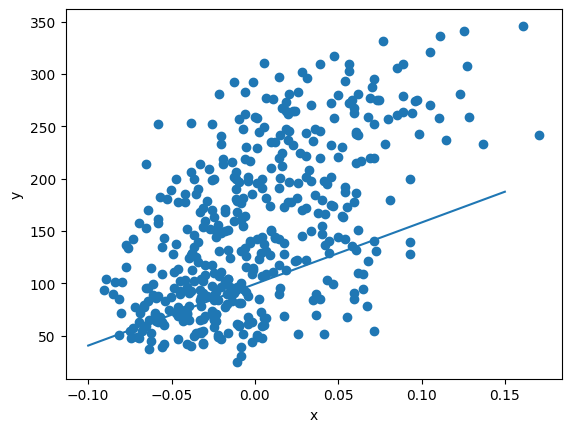

In [20]:
# 전체 샘플을 반복해서 얻어낸 모델이 전체 데이터셋을 잘 표현하는지 그래프로 볼 수 있음
# 산점도 위에 w, b를 이용한 직선을 그려보면 됨
# x좌표 2개를 [-0.1, 0.15]로 지정
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 02-4-8. 여러 에포크 반복하기
- 보통 경사 하강법에서는 주어진 훈련데이터로 학습을 여러번 반복함
- 전체 훈련데이터를 모두 이용하여 한 단위의 작업을 진행하는 것 : 에포크(epoch)
- 일반적으로 수십에서 수천번 정도
- for문 바깥쪽에 for문 하나 더 씌우면 됨

In [21]:
for i in range(1, 100): # 100번의 에포크 반복
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


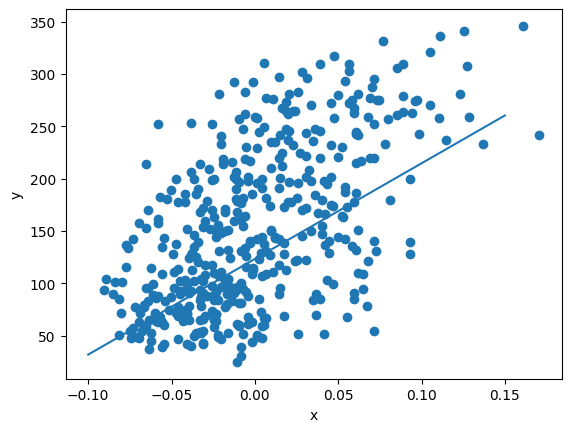

In [22]:
# 반복하여 찾은 w, b를 그래프로 확인
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### y^=913.6x+123.4
- 직선이 전체 데이터의 경향성을 잘 따라간다면 데이터의 잘 맞는 머신러닝 모델을 찾은 것

## 02-4-9. 모델로 예측하기
- 입력 x에 없었던 새로운 데이터가 발생했다면 이제, 찾은 모델에 x를 넣고 계산

In [23]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


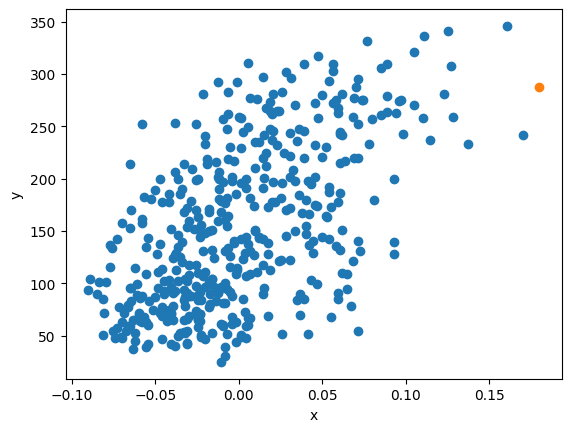

In [24]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 02-5. 손실함수와 경사하강법의 관계
- 경사하강법 기술적 정의: 어떤 손실함수가 정의 되었을 때, 손실함수의 값이 최소가 되는 지점을 찾아가는 방법
- 손실함수란 예상한 값과 실제 타깃값의 차이를 함수로 정의한 것 
- 오차를 변화율에 곱하여 가중치와 절편 업데이트하기는 사실 '제곱오차'라는 손실함수를 미분한 것과 같음
- 제곱오차(squared error) : 타깃값에서 예측값을 뺀 다음 제곱한 값
- 제곱오차가 최소가 되면 산점도를 가장 잘 표현한 직선이 그려짐
- 즉, 제곱오차의 최솟값을 알면 모델을 쉽게 만들 수 있음
- 손실 함수에 대해 일일이 변화율의 값을 계산하는 대신 편미분을 사용함
- 인공지는 분야에서는 변화율을 그레디언트(gradient, 경사)라고 부름
- 손실함수(loss funtion) = 비용함수(cost funtion) = 목적함수(objective funtion) 비슷하게 쓰임

# 02-6. 뉴런 만들기
- 경사하강법의 알고리즘을 Neuron이라는 이름의 파이썬 클래스로 만들기

In [25]:
class Neuron:
    
    def __init__(self): # __init__()메서드 변수 선언
        self.w = 1.0     # 가중치를 초기화
        self.b = 1.0     # 절편을 초기화
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크 100 반복 수행
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

In [26]:
# 모델 훈련하기
neuron = Neuron()
neuron.fit(x, y)

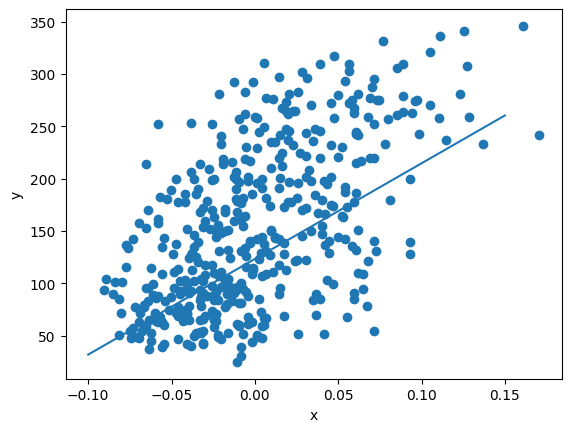

In [27]:
# 학습 완료 모델 가중치, 절편 확인하기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()